In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time","wxcodes_o"],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wxcodes_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M              74.1%
BCFG            7.0%
FG              3.6%
-RA             2.1%
BR              1.5%
RA              1.2%
-RA BCFG        1.0%
RA BCFG         0.7%
BCFG -RA        0.7%
-RA BR          0.6%
RA FG           0.6%
-RA FG          0.6%
RA BR           0.5%
BCFG RA         0.5%
SHRA            0.4%
-DZ             0.3%
VCFG            0.3%
FG DZ           0.3%
FG -RA          0.3%
BCFG -DZ        0.2%
DZ              0.2%
FG RA           0.2%
-DZ FG          0.2%
FG -DZ          0.2%
DZ BCFG         0.2%
+RA FG          0.2%
DZ FG           0.2%
BCFG DZ         0.1%
DZ BR           0.1%
-DZ BCFG        0.1%
-RADZ BCFG      0.1%
-DZ BR          0.1%
+RA BCFG        0.1%
-RADZ           0.1%
+DZ FG          0.1%
-SHRA           0.1%
-RADZ BR        0.1%
+SHRA           0.1%
+RA BR          0.1%
BR RA           0.1%
+RA             0.1%
TS              0.1%
BR -DZ          0.1%
-RADZ FG        0.1%
FG -RADZ        0.1%
BR -RA          0.0%
SHRA BCFG       0.0%
+DZ BR       

In [5]:
#label br/fg

station["prec_l"] = "No RA/DZ"
mask = station['wxcodes_o'].str.contains("RA")
station.loc[mask,["prec_l"]] = "RA/DZ"
mask = station['wxcodes_o'].str.contains("DZ")
station.loc[mask,["prec_l"]] = "RA/DZ"

print(station.sample(100))
print("*****************************")
station["prec_l"].value_counts(normalize=True)

                    wxcodes_o    prec_l
time                                   
2020-03-31 06:00:00         M  No RA/DZ
2020-02-23 10:00:00         M  No RA/DZ
2019-08-10 16:30:00         M  No RA/DZ
2018-11-21 19:30:00       -RA     RA/DZ
2019-11-03 15:00:00  -RA BCFG     RA/DZ
2019-10-23 05:30:00         M  No RA/DZ
2019-07-01 21:00:00         M  No RA/DZ
2020-03-14 05:30:00         M  No RA/DZ
2020-12-20 19:00:00    -RA BR     RA/DZ
2019-11-30 20:30:00         M  No RA/DZ
2020-01-29 16:30:00   BCFG RA     RA/DZ
2019-10-15 16:00:00         M  No RA/DZ
2020-05-24 21:00:00         M  No RA/DZ
2018-11-07 03:30:00         M  No RA/DZ
2020-12-18 09:00:00   BCFG DZ     RA/DZ
2020-09-11 18:00:00         M  No RA/DZ
2020-03-29 22:00:00         M  No RA/DZ
2018-10-30 12:30:00         M  No RA/DZ
2020-06-27 19:30:00         M  No RA/DZ
2019-11-18 20:00:00         M  No RA/DZ
2019-06-12 11:00:00         M  No RA/DZ
2018-12-13 21:30:00         M  No RA/DZ
2020-12-12 06:30:00     -RADZ     RA/DZ


No RA/DZ    0.867321
RA/DZ       0.132679
Name: prec_l, dtype: float64

**Forecast D0**

In [6]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [7]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wxcodes_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,prec_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-09-25 21:00:00,No RA/DZ,158.688370,0.0,2695.525391,1.790166,2.218339,102165.984375,287.538300,0.978594,24038.228516,...,8.478000,-1.983906e-01,0.000000,0.500000,0.000000,0.500000,5766.208008,1526.832153,264.925568,285.345825
2020-08-07 08:00:00,No RA/DZ,304.250732,0.0,3362.515137,1.673159,2.116463,101698.078125,293.547302,0.775253,24037.669922,...,0.000000,1.679688e-05,0.000000,0.000000,0.000000,0.000000,5788.078613,1534.658936,265.087677,292.033630
2020-06-05 20:00:00,No RA/DZ,276.130707,0.0,2493.126221,4.190858,5.442876,101453.179688,287.461700,0.936637,24077.158203,...,0.000000,3.789063e-04,0.000000,0.013066,0.000000,0.013066,5663.240234,1492.394775,259.351929,285.067932
2019-12-15 06:00:00,RA/DZ,301.409851,0.0,1564.597656,6.138786,9.710991,100974.296875,283.494812,0.974209,3839.319580,...,6.240000,-1.289062e-04,0.200000,0.416100,0.300000,0.416100,5480.576172,1424.051514,253.649811,277.474762
2020-05-25 09:00:00,No RA/DZ,141.407349,0.0,2980.943848,0.968810,0.611865,102395.890625,295.859802,0.595636,24135.000000,...,0.000000,-3.984375e-04,0.000000,0.000000,0.000000,0.000000,5793.763184,1573.748901,263.423950,287.246948
2019-04-27 19:00:00,No RA/DZ,279.240112,0.0,1728.076294,3.737345,4.775948,102771.789062,285.152588,0.947249,24041.244141,...,0.000000,3.710937e-04,0.000000,0.000000,0.000000,0.000000,5711.061035,1558.852173,256.018555,280.521698
2020-08-04 14:00:00,No RA/DZ,276.159088,0.0,3417.271729,4.601374,4.328941,101584.429688,300.423798,0.529758,24135.000000,...,0.000000,-4.921875e-07,0.489899,0.000000,0.000000,0.489899,5802.460938,1533.531006,268.681061,289.024628
2020-05-22 19:00:00,No RA/DZ,287.291077,0.0,2566.774658,4.353580,5.931495,102699.023438,288.268311,0.969769,24041.835938,...,0.846000,6.640625e-05,0.260000,0.020422,0.000000,0.260000,5784.259277,1569.166626,261.399261,284.737762
2019-05-30 18:00:00,No RA/DZ,286.317688,0.0,2869.960205,4.607243,6.932371,102364.671875,296.521820,0.516230,24135.000000,...,0.000000,3.359375e-03,0.000000,0.000000,0.000000,0.000000,5800.481445,1581.489258,261.008240,289.474548


In [8]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:18<00:00,  2.71s/it]


In [9]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.84,0.83,None,0.86,0.21
GaussianNB,0.83,0.83,None,0.86,0.14
NearestCentroid,0.85,0.83,None,0.87,0.27
Perceptron,0.87,0.80,None,0.88,0.28
PassiveAggressiveClassifier,0.87,0.80,None,0.88,0.35
SGDClassifier,0.89,0.79,None,0.90,0.43
QuadraticDiscriminantAnalysis,0.84,0.79,None,0.86,0.43
LabelSpreading,0.91,0.76,None,0.91,16.73
LabelPropagation,0.91,0.76,None,0.91,8.90


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2758    168  2926
RA/DZ          132    236   368
All           2890    404  3294
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.94      0.95  2926.00
RA/DZ              0.58    0.64      0.61   368.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.77    0.79      0.78  3294.00
weighted avg       0.91    0.91      0.91  3294.00

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2744    148  2892
RA/DZ          159    243   402
All           2903    391  3294
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.95      0.95  2892.00
RA/DZ              0.62    0.60   

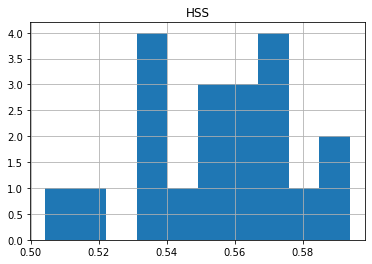

In [10]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [11]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [13]:

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:19<00:00,  2.74s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.83,0.84,None,0.86,0.22
QuadraticDiscriminantAnalysis,0.85,0.83,None,0.87,0.74
NearestCentroid,0.84,0.83,None,0.86,0.51
BernoulliNB,0.83,0.82,None,0.85,0.22
SGDClassifier,0.88,0.80,None,0.89,0.43
Perceptron,0.88,0.76,None,0.89,0.31
LabelSpreading,0.90,0.75,None,0.90,13.35
LabelPropagation,0.90,0.75,None,0.90,10.07
LGBMClassifier,0.92,0.75,None,0.92,1.51



Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2784    161  2945
RA/DZ          126    223   349
All           2910    384  3294
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.96    0.95      0.95  2945.00
RA/DZ              0.58    0.64      0.61   349.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.77    0.79      0.78  3294.00
weighted avg       0.92    0.91      0.91  3294.00

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2759    162  2921
RA/DZ          147    226   373
All           2906    388  3294
Heidke Skill Score: 0.54

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.95    0.94      0.95  2921.00
RA/DZ              0.58    0.61   

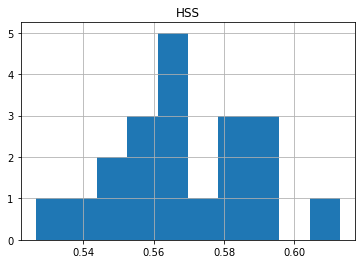

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();


In [16]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("prec_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [17]:
import sklearn
print(sklearn.__version__)

0.24.1


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.prec_l
X = df_all1k.iloc[:,1:]


# loop random
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2060    137  2197
RA/DZ           62    212   274
All           2122    349  2471
Heidke Skill Score: 0.64

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.97    0.94      0.95  2197.00
RA/DZ              0.61    0.77      0.68   274.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.79    0.86      0.82  2471.00
weighted avg       0.93    0.92      0.92  2471.00

Matriz de Confusión  (Machine Learning)

col_0     No RA/DZ  RA/DZ   All
prec_l                         
No RA/DZ      2036    161  2197
RA/DZ           67    207   274
All           2103    368  2471
Heidke Skill Score: 0.59

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
No RA/DZ           0.97    0.93      0.95  2197.00
RA/DZ              0.56    0.76   

,HSS
count,10.00
mean,0.61
std,0.02
min,0.58
25%,0.59
50%,0.61
75%,0.63
max,0.66
